In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [3]:
df_train = pd.read_csv('train_wn75k28.csv')
df_test = pd.read_csv('test_Wf7sxXF.csv')
df_train.head(5)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
df_train.shape

(39161, 19)

### Basic statistics

In [5]:
df_train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


* We can see that most of the values are already converted to one_hot or label encoding

### Null value check

In [6]:
df_train.isnull().sum() / df_train.shape[0]

id                      0.000000
created_at              0.000000
campaign_var_1          0.000000
campaign_var_2          0.000000
products_purchased      0.533975
signup_date             0.385920
user_activity_var_1     0.000000
user_activity_var_2     0.000000
user_activity_var_3     0.000000
user_activity_var_4     0.000000
user_activity_var_5     0.000000
user_activity_var_6     0.000000
user_activity_var_7     0.000000
user_activity_var_8     0.000000
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    0.000000
user_activity_var_12    0.000000
buy                     0.000000
dtype: float64

* As there are almost 53% values missing in products_purchased, I will drop that column at the end.

### Checking the data types of each attribute

In [7]:
df_train.dtypes

id                        int64
created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
dtype: object

/Users/chinmay/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


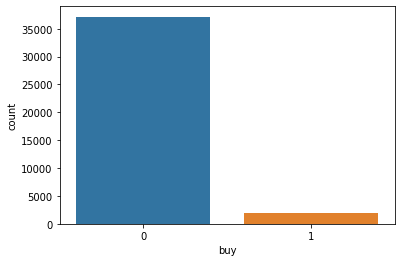

In [8]:
sns.countplot(df_train['buy'])
plt.show()

### We can see that we are dealing with imbalance dataset


In [9]:
df_train['signup_date_isnull']  = df_train['signup_date'].isnull().astype(int)
df_test['signup_date_isnull']  = df_test['signup_date'].isnull().astype(int)

In [10]:
df_train['signup_date_month'] = pd.to_datetime(df_train['signup_date']).dt.month
df_test['signup_date_month'] = pd.to_datetime(df_test['signup_date']).dt.month

In [11]:
df_train['signup_date_month'] = df_train['signup_date_month'].fillna(df_train['signup_date_month'].mode()[0])
df_test['signup_date_month'] = df_test['signup_date_month'].fillna(df_train['signup_date_month'].mode()[0])

In [12]:
df_train['created_at'] = pd.to_datetime(df_train.created_at)
df_test['created_at'] = pd.to_datetime(df_test.created_at)

In [13]:
df_train['created_at_month'] = df_train['created_at'].dt.month
df_train['created_at_week'] = df_train['created_at'].dt.isocalendar().week.astype("int64")
df_train['created_at_day'] = df_train['created_at'].dt.day

In [14]:
df_test['created_at_month'] = df_test['created_at'].dt.month
df_test['created_at_week'] = df_test['created_at'].dt.isocalendar().week.astype("int64")
df_test['created_at_day'] = df_test['created_at'].dt.day

## Modeling

In [15]:
X_train = df_train.drop(['signup_date','buy','products_purchased','created_at'], axis=1)
X_test = df_test.drop(['products_purchased','signup_date','created_at'], axis=1)
y_train = df_train['buy']

### Catboost

In [16]:
from catboost import CatBoostClassifier

/Users/chinmay/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [17]:
model = CatBoostClassifier()

In [18]:
model.fit(X_train, y_train)
preds_class = model.predict(X_test)

Learning rate set to 0.049327
0:	learn: 0.6105080	total: 73.8ms	remaining: 1m 13s
1:	learn: 0.5434387	total: 83.3ms	remaining: 41.6s
2:	learn: 0.4661464	total: 97.2ms	remaining: 32.3s
3:	learn: 0.4140173	total: 112ms	remaining: 28s
4:	learn: 0.3710007	total: 129ms	remaining: 25.6s
5:	learn: 0.3333673	total: 150ms	remaining: 24.9s
6:	learn: 0.3027902	total: 167ms	remaining: 23.7s
7:	learn: 0.2740053	total: 206ms	remaining: 25.6s
8:	learn: 0.2497174	total: 227ms	remaining: 25s
9:	learn: 0.2323372	total: 248ms	remaining: 24.5s
10:	learn: 0.2180871	total: 268ms	remaining: 24.1s
11:	learn: 0.2031022	total: 280ms	remaining: 23.1s
12:	learn: 0.1839994	total: 292ms	remaining: 22.2s
13:	learn: 0.1708098	total: 303ms	remaining: 21.4s
14:	learn: 0.1616570	total: 314ms	remaining: 20.6s
15:	learn: 0.1540247	total: 325ms	remaining: 20s
16:	learn: 0.1446608	total: 338ms	remaining: 19.5s
17:	learn: 0.1400545	total: 348ms	remaining: 19s
18:	learn: 0.1359654	total: 360ms	remaining: 18.6s
19:	learn: 0.12

162:	learn: 0.0814686	total: 3.32s	remaining: 17.1s
163:	learn: 0.0813959	total: 3.35s	remaining: 17.1s
164:	learn: 0.0813005	total: 3.36s	remaining: 17s
165:	learn: 0.0812682	total: 3.38s	remaining: 17s
166:	learn: 0.0812534	total: 3.39s	remaining: 16.9s
167:	learn: 0.0811830	total: 3.4s	remaining: 16.9s
168:	learn: 0.0811432	total: 3.42s	remaining: 16.8s
169:	learn: 0.0810986	total: 3.43s	remaining: 16.8s
170:	learn: 0.0810216	total: 3.45s	remaining: 16.7s
171:	learn: 0.0809642	total: 3.47s	remaining: 16.7s
172:	learn: 0.0809441	total: 3.48s	remaining: 16.7s
173:	learn: 0.0808758	total: 3.5s	remaining: 16.6s
174:	learn: 0.0807889	total: 3.52s	remaining: 16.6s
175:	learn: 0.0807196	total: 3.54s	remaining: 16.6s
176:	learn: 0.0807006	total: 3.55s	remaining: 16.5s
177:	learn: 0.0806533	total: 3.57s	remaining: 16.5s
178:	learn: 0.0805810	total: 3.58s	remaining: 16.4s
179:	learn: 0.0805313	total: 3.59s	remaining: 16.3s
180:	learn: 0.0805156	total: 3.6s	remaining: 16.3s
181:	learn: 0.08046

321:	learn: 0.0747627	total: 5.57s	remaining: 11.7s
322:	learn: 0.0747506	total: 5.59s	remaining: 11.7s
323:	learn: 0.0747301	total: 5.6s	remaining: 11.7s
324:	learn: 0.0746965	total: 5.62s	remaining: 11.7s
325:	learn: 0.0746617	total: 5.63s	remaining: 11.7s
326:	learn: 0.0746221	total: 5.67s	remaining: 11.7s
327:	learn: 0.0746084	total: 5.68s	remaining: 11.6s
328:	learn: 0.0745809	total: 5.69s	remaining: 11.6s
329:	learn: 0.0745085	total: 5.7s	remaining: 11.6s
330:	learn: 0.0744608	total: 5.71s	remaining: 11.5s
331:	learn: 0.0744099	total: 5.72s	remaining: 11.5s
332:	learn: 0.0743542	total: 5.74s	remaining: 11.5s
333:	learn: 0.0742935	total: 5.75s	remaining: 11.5s
334:	learn: 0.0742415	total: 5.76s	remaining: 11.4s
335:	learn: 0.0742162	total: 5.78s	remaining: 11.4s
336:	learn: 0.0741702	total: 5.79s	remaining: 11.4s
337:	learn: 0.0741280	total: 5.81s	remaining: 11.4s
338:	learn: 0.0740709	total: 5.83s	remaining: 11.4s
339:	learn: 0.0740281	total: 5.85s	remaining: 11.4s
340:	learn: 0.

486:	learn: 0.0698826	total: 8.2s	remaining: 8.64s
487:	learn: 0.0698516	total: 8.23s	remaining: 8.64s
488:	learn: 0.0698290	total: 8.24s	remaining: 8.62s
489:	learn: 0.0697792	total: 8.26s	remaining: 8.6s
490:	learn: 0.0697366	total: 8.27s	remaining: 8.58s
491:	learn: 0.0697074	total: 8.29s	remaining: 8.55s
492:	learn: 0.0696822	total: 8.3s	remaining: 8.53s
493:	learn: 0.0696131	total: 8.31s	remaining: 8.51s
494:	learn: 0.0695904	total: 8.32s	remaining: 8.49s
495:	learn: 0.0695764	total: 8.33s	remaining: 8.46s
496:	learn: 0.0695435	total: 8.34s	remaining: 8.44s
497:	learn: 0.0695122	total: 8.35s	remaining: 8.42s
498:	learn: 0.0695002	total: 8.36s	remaining: 8.4s
499:	learn: 0.0694572	total: 8.37s	remaining: 8.37s
500:	learn: 0.0694299	total: 8.39s	remaining: 8.35s
501:	learn: 0.0693898	total: 8.41s	remaining: 8.34s
502:	learn: 0.0693749	total: 8.42s	remaining: 8.32s
503:	learn: 0.0693600	total: 8.43s	remaining: 8.3s
504:	learn: 0.0693390	total: 8.45s	remaining: 8.28s
505:	learn: 0.069

647:	learn: 0.0661925	total: 10.3s	remaining: 5.58s
648:	learn: 0.0661567	total: 10.3s	remaining: 5.57s
649:	learn: 0.0661347	total: 10.3s	remaining: 5.55s
650:	learn: 0.0661266	total: 10.3s	remaining: 5.53s
651:	learn: 0.0661141	total: 10.3s	remaining: 5.51s
652:	learn: 0.0660831	total: 10.3s	remaining: 5.49s
653:	learn: 0.0660761	total: 10.3s	remaining: 5.47s
654:	learn: 0.0660584	total: 10.4s	remaining: 5.46s
655:	learn: 0.0660440	total: 10.4s	remaining: 5.44s
656:	learn: 0.0660276	total: 10.4s	remaining: 5.42s
657:	learn: 0.0660024	total: 10.4s	remaining: 5.4s
658:	learn: 0.0659597	total: 10.4s	remaining: 5.38s
659:	learn: 0.0659434	total: 10.4s	remaining: 5.37s
660:	learn: 0.0659200	total: 10.4s	remaining: 5.35s
661:	learn: 0.0659021	total: 10.4s	remaining: 5.33s
662:	learn: 0.0658794	total: 10.4s	remaining: 5.31s
663:	learn: 0.0658554	total: 10.5s	remaining: 5.29s
664:	learn: 0.0658292	total: 10.5s	remaining: 5.27s
665:	learn: 0.0658183	total: 10.5s	remaining: 5.26s
666:	learn: 0

814:	learn: 0.0622226	total: 12.5s	remaining: 2.85s
815:	learn: 0.0622039	total: 12.6s	remaining: 2.83s
816:	learn: 0.0621608	total: 12.6s	remaining: 2.81s
817:	learn: 0.0621495	total: 12.6s	remaining: 2.8s
818:	learn: 0.0621231	total: 12.6s	remaining: 2.78s
819:	learn: 0.0621092	total: 12.6s	remaining: 2.77s
820:	learn: 0.0620992	total: 12.6s	remaining: 2.75s
821:	learn: 0.0620611	total: 12.6s	remaining: 2.73s
822:	learn: 0.0620190	total: 12.6s	remaining: 2.72s
823:	learn: 0.0619722	total: 12.6s	remaining: 2.7s
824:	learn: 0.0619644	total: 12.7s	remaining: 2.68s
825:	learn: 0.0619405	total: 12.7s	remaining: 2.67s
826:	learn: 0.0619344	total: 12.7s	remaining: 2.65s
827:	learn: 0.0618934	total: 12.7s	remaining: 2.63s
828:	learn: 0.0618710	total: 12.7s	remaining: 2.62s
829:	learn: 0.0618575	total: 12.7s	remaining: 2.6s
830:	learn: 0.0618396	total: 12.7s	remaining: 2.59s
831:	learn: 0.0618259	total: 12.7s	remaining: 2.57s
832:	learn: 0.0618082	total: 12.8s	remaining: 2.56s
833:	learn: 0.0

978:	learn: 0.0588758	total: 14.6s	remaining: 313ms
979:	learn: 0.0588613	total: 14.6s	remaining: 298ms
980:	learn: 0.0588297	total: 14.6s	remaining: 284ms
981:	learn: 0.0588026	total: 14.7s	remaining: 269ms
982:	learn: 0.0587950	total: 14.7s	remaining: 254ms
983:	learn: 0.0587847	total: 14.7s	remaining: 239ms
984:	learn: 0.0587655	total: 14.7s	remaining: 224ms
985:	learn: 0.0587453	total: 14.7s	remaining: 209ms
986:	learn: 0.0587421	total: 14.7s	remaining: 194ms
987:	learn: 0.0587394	total: 14.7s	remaining: 179ms
988:	learn: 0.0587275	total: 14.7s	remaining: 164ms
989:	learn: 0.0587183	total: 14.7s	remaining: 149ms
990:	learn: 0.0587058	total: 14.8s	remaining: 134ms
991:	learn: 0.0586913	total: 14.8s	remaining: 119ms
992:	learn: 0.0586743	total: 14.8s	remaining: 104ms
993:	learn: 0.0586576	total: 14.8s	remaining: 89.3ms
994:	learn: 0.0586455	total: 14.8s	remaining: 74.4ms
995:	learn: 0.0586340	total: 14.8s	remaining: 59.5ms
996:	learn: 0.0586148	total: 14.8s	remaining: 44.6ms
997:	lea

In [19]:
preds_proba_catboost = model.predict_proba(X_test)

### XGBoost

### Best parameters found by running optuna for xgboost on GPU

In [20]:
best_params = {'n_estimators' : 1000, 'learning_rate' : 0.05,
               'max_depth': 4, 'random_state' : 1}

In [21]:
import xgboost as xgb
from sklearn.metrics import f1_score

model = xgb.XGBClassifier(**best_params)

In [22]:
dtrain  = xgb.DMatrix(X_train, label= y_train,feature_names=X_train.columns)

In [23]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/chinmay/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/chinmay/miniconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:55:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
preds_proba_xgboost = model.predict_proba(X_test)

## Ensemble


* As the XGBoost gave good result so we will take the weight of 0.8 and catboost weight 0.2

In [30]:
finalpred=(preds_proba_xgboost[:,1] * 0.9 + preds_proba_catboost [:,1] *0.1)

In [31]:
final_pred =  np.rint(finalpred)

In [32]:
Submission = pd.DataFrame({'id':df_test['id'].values})
Submission['buy']=final_pred

In [33]:
Submission.to_csv('c_sample_submission_xgcat_final.csv', index=False)